Here we investigate how the uncertainty in time delay is affected by the bias voltage applied to the laser pulser (i.e. how does the light intensity affect the time resolution of the SiPM).

In [1]:
import sys        
sys.path.append('/Users/lanabozanic/MATHUSLA') # Change this to the dir where mathusladataprocessing.py is.     

from mathusladataprocessing import *

uncertainty vs. bias voltage/uncertainty exttrig -04.csv


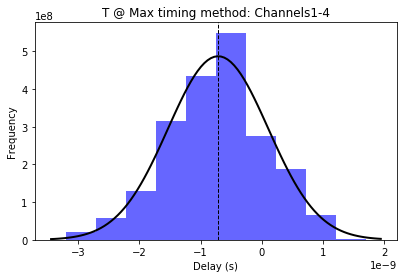

- Mean: -0.714 ns \\ 
- Standard Deviation: 0.819 ns \\ 
- Median: -0.700 ns \\ 
uncertainty vs. bias voltage/uncertainty exttrig -05.csv


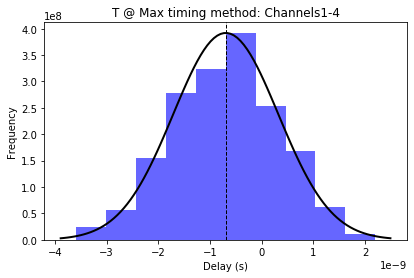

- Mean: -0.696 ns \\ 
- Standard Deviation: 1.018 ns \\ 
- Median: -0.600 ns \\ 
uncertainty vs. bias voltage/uncertainty exttrig -06.csv


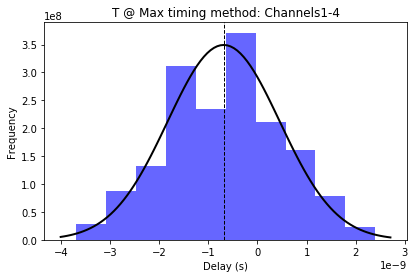

- Mean: -0.688 ns \\ 
- Standard Deviation: 1.142 ns \\ 
- Median: -0.600 ns \\ 
uncertainty vs. bias voltage/uncertainty exttrig -07.csv


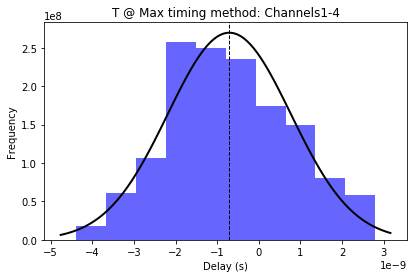

- Mean: -0.709 ns \\ 
- Standard Deviation: 1.480 ns \\ 
- Median: -0.700 ns \\ 
uncertainty vs. bias voltage/uncertainty exttrig -08.csv


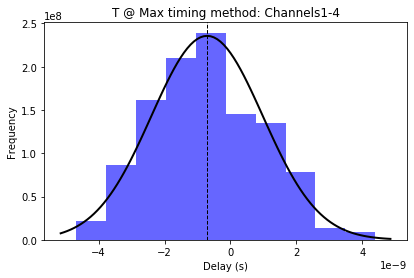

- Mean: -0.710 ns \\ 
- Standard Deviation: 1.693 ns \\ 
- Median: -0.900 ns \\ 
uncertainty vs. bias voltage/uncertainty exttrig -09.csv


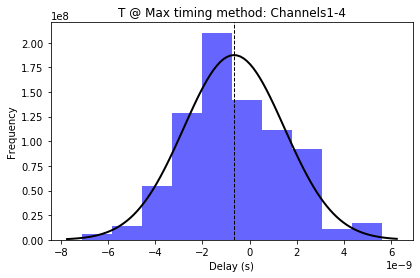

- Mean: -0.659 ns \\ 
- Standard Deviation: 2.129 ns \\ 
- Median: -0.900 ns \\ 
uncertainty vs. bias voltage/uncertainty exttrig -10.csv


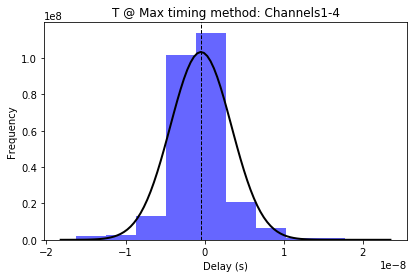

- Mean: -0.467 ns \\ 
- Standard Deviation: 3.859 ns \\ 
- Median: -0.900 ns \\ 


In [2]:
all_tds = []
for f in sorted(glob.glob(os.path.join("uncertainty vs. bias voltage", "*.csv"))):
    print(f)
    tds = Timing('t@max', channels=['1', '4'], data = f).td_TAM()
    all_tds.append(tds)

uncertainty vs. bias voltage/uncertainty exttrig -04.csv
**Channel 1 stats** \
- Mean: 29.434 ns \\ 
- Standard Deviation: 0.495 ns \\ 
- Median: 29.400 ns \\ 

**Channel 4 stats** \
- Mean: 30.147 ns \\ 
- Standard Deviation: 0.649 ns \\ 
- Median: 30.200 ns \\ 



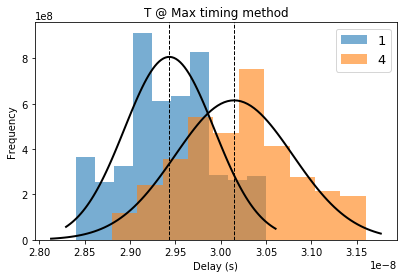

uncertainty vs. bias voltage/uncertainty exttrig -05.csv
**Channel 1 stats** \
- Mean: 29.322 ns \\ 
- Standard Deviation: 0.588 ns \\ 
- Median: 29.400 ns \\ 

**Channel 4 stats** \
- Mean: 30.018 ns \\ 
- Standard Deviation: 0.802 ns \\ 
- Median: 30.000 ns \\ 



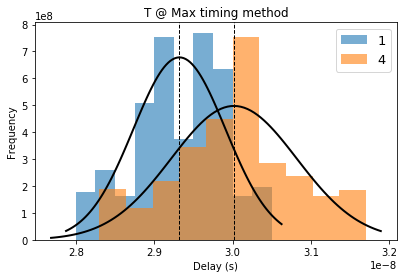

uncertainty vs. bias voltage/uncertainty exttrig -06.csv
**Channel 1 stats** \
- Mean: 29.245 ns \\ 
- Standard Deviation: 0.600 ns \\ 
- Median: 29.200 ns \\ 

**Channel 4 stats** \
- Mean: 29.933 ns \\ 
- Standard Deviation: 0.957 ns \\ 
- Median: 30.000 ns \\ 



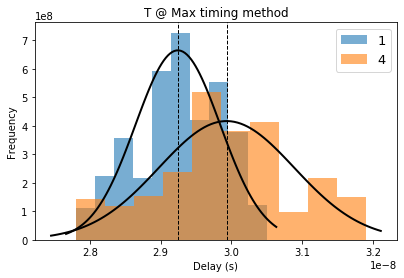

uncertainty vs. bias voltage/uncertainty exttrig -07.csv
**Channel 1 stats** \
- Mean: 28.712 ns \\ 
- Standard Deviation: 0.800 ns \\ 
- Median: 28.800 ns \\ 

**Channel 4 stats** \
- Mean: 29.421 ns \\ 
- Standard Deviation: 1.219 ns \\ 
- Median: 29.700 ns \\ 



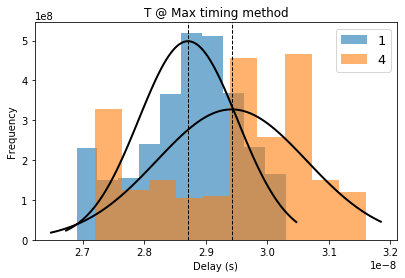

uncertainty vs. bias voltage/uncertainty exttrig -08.csv
**Channel 1 stats** \
- Mean: 28.685 ns \\ 
- Standard Deviation: 1.041 ns \\ 
- Median: 28.800 ns \\ 

**Channel 4 stats** \
- Mean: 29.395 ns \\ 
- Standard Deviation: 1.337 ns \\ 
- Median: 29.700 ns \\ 



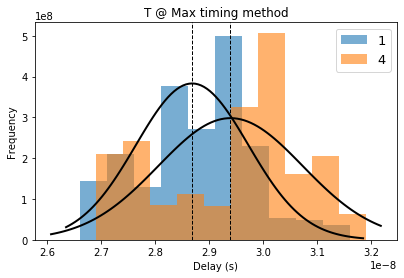

uncertainty vs. bias voltage/uncertainty exttrig -09.csv
**Channel 1 stats** \
- Mean: 28.669 ns \\ 
- Standard Deviation: 1.407 ns \\ 
- Median: 28.800 ns \\ 

**Channel 4 stats** \
- Mean: 29.328 ns \\ 
- Standard Deviation: 1.577 ns \\ 
- Median: 29.700 ns \\ 



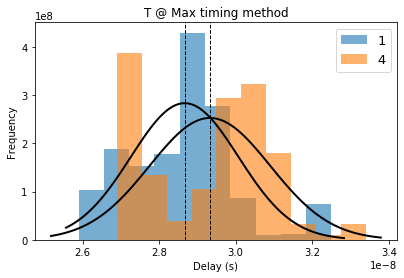

uncertainty vs. bias voltage/uncertainty exttrig -10.csv
**Channel 1 stats** \
- Mean: 29.051 ns \\ 
- Standard Deviation: 2.179 ns \\ 
- Median: 28.800 ns \\ 

**Channel 4 stats** \
- Mean: 29.518 ns \\ 
- Standard Deviation: 3.168 ns \\ 
- Median: 30.000 ns \\ 



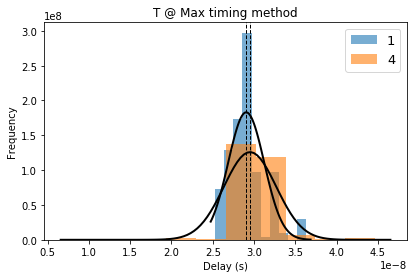

In [3]:
for f in sorted(glob.glob(os.path.join("uncertainty vs. bias voltage", "*.csv"))):
    print(f)
    tds = Timing('t@max', channels=['1', '4'], data = f).single_histograms()

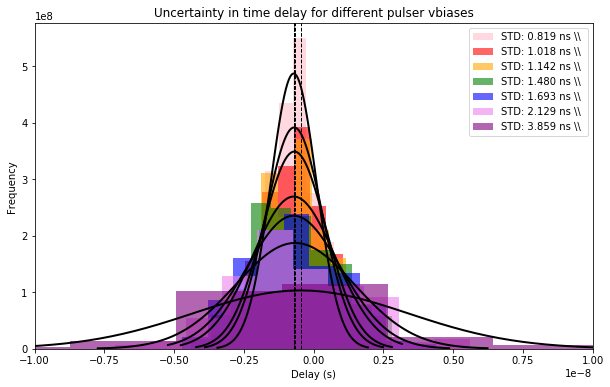

In [4]:
stds = []
colours=['pink','red', 'orange', 'green', 'blue', 'violet', 'purple']
# Create plot, if desired
for tds, colour in zip(all_tds, colours):
    plt.rcParams["figure.figsize"] = (10,6)

    td = tds['1-4']
    
    sr_rounded = "{:.3f}".format((np.std(td)) * 10 ** 9)


    SD = "STD: " + str(sr_rounded) + " ns \\\ "
    stds.append((np.std(td)) * 10 ** 9)
    
    plt.title("Uncertainty in time delay for different pulser vbiases")
    plt.xlabel("Delay (s)")
    plt.ylabel("Frequency")
    plt.axvline(td.mean(),color='k', linestyle='dashed', linewidth=1)
    plt.hist(td, density=True, alpha=0.6, color=colour, label=SD)


    # gaussian fit to histogram
    mu, std = norm.fit(td) # find the mean & std of the data fitted to a norm. dist.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

   

plt.xlim(-1e-8, 1e-8)
plt.legend()    
plt.show()

In [5]:
opt = scipy.optimize.curve_fit(lambda t,m,b: m*t + b,  np.linspace(-0.4, -1, 7), stds)
m, b = opt[0]
print(m,b)

-4.247362020553673 -1.2390431067077465


In [6]:
np.linspace(-0.4, -1, 7)

array([-0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. ])

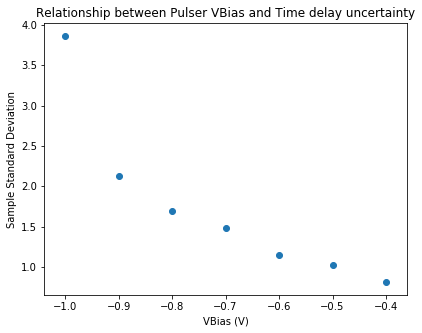

In [7]:
plt.rcParams["figure.figsize"] = (6.5,5)

plt.title("Relationship between Pulser VBias and Time delay uncertainty")
plt.xlabel("VBias (V)")
plt.ylabel("Sample Standard Deviation")
    
x=np.linspace(-0.4, -1, 7)
#plt.plot(x, a*np.exp(c*x), label = "Fit m* + b, m={:.3f}, b={:.3f}".format(m,b))
plt.scatter(np.linspace(-0.4, -1, 7), stds)
plt.show()

In [8]:
find_rmsd(x, stds, a,c)

NameError: name 'a' is not defined

In [ ]:
opt2 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  np.linspace(-0.4, -1, 7), stds)

In [ ]:
a,c = opt2[0]

In [ ]:
np.linspace(-0.4, -1, 7)

In [ ]:
stds

In [ ]:
type(stds[0])